Python Data Science Handbook by Jake VanderPlas 
[Link](https://jakevdp.github.io/PythonDataScienceHandbook/)

# Chapter: Data Manipulation with Pandas

In [134]:
# to display all the contents of the pandas namespace, you can type
pd.<TAB>

# to display Pandas's built-in documentation, you can use this:
pd?

SyntaxError: invalid syntax (4059099035.py, line 2)

# Introducting Pandas Objects

## The Pandas Series Object


In [135]:
import numpy as np
import pandas as pd

In [136]:
# a pandas series is a 1d array of indexed data
# can be created from a list or array as follows
data = pd.Series([0.25, 0.5, 0.75, 1.0])

In [137]:
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [138]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [139]:
# The index is an array-like object of type pd.Index
data.index

RangeIndex(start=0, stop=4, step=1)

In [140]:
# data can be accessed by associated index via familiar python square-bracket notation
data[1]

0.5

In [141]:
data[1:3]

1    0.50
2    0.75
dtype: float64

### [series] as a generalised NumPy array

In [142]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                index = ['a', 'b', 'c', 'd' ])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [143]:
data['b']

0.5

In [144]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
index = [2, 5, 3, 7])
data

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

In [145]:
data[5]

0.5

### Series as specialised dictionary

- Pandas [series] -> like a specialised python dictionary
- dictionary is a sgtructure which maps arbitrary keys to a set of values
- a [series] is a structure which maps typed keys to a set of values

In [146]:
population_dict = {'California': 38332521,
                   'Texas':      26448193,
                   'New York':   19651127,
                   'Florida':    19552860,
                   'Illinois':   12882135 }

population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

- a series will be created where the index is drawn from the sorted keys. 

In [147]:
population['California']

38332521

In [148]:
# series (unlike dictoinary) supports array-style operations like slicing
population['California':'Illinois']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

### Consructing Series objects

- constructing pandas series from scratch
- pd.Series(data, index=index)
- index optional

In [149]:
#data can be a list or NumPy array, index defaults to integer seq
pd.Series([2,4,6])

0    2
1    4
2    6
dtype: int64

In [150]:
pd.Series(5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

In [151]:
pd.Series({2:'a', 1:'b', 3:'c'})

2    a
1    b
3    c
dtype: object

## The Pandas DataFrame Object

- [Series] is an analog of a 1d array
- [dataframe] is an analog of 2d array
- dataframe a sequence of aligned series obj (alighned = share same index)


In [152]:
import pandas as pd

In [153]:
# construct a new series

area_dict = {'California': 423967, 'Texas': 695662,
             'New York': 695662,   'Florida': 170312,
             'Illinois': 149995 }
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      695662
Florida       170312
Illinois      149995
dtype: int64

In [154]:
# add population
# create a 2d object using dictionary

states = pd.DataFrame({'popluation': population,
                       'area': area })

states

,popluation,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,695662
Florida,19552860,170312
Illinois,12882135,149995


In [155]:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [156]:
states.columns

Index(['popluation', 'area'], dtype='object')

Dataframe as a specialized dictionary

In [157]:
#dataframe specialised dictionary
# dict maps a key to a value
# dataframe maps a col name to a series of col data

states['area']

California    423967
Texas         695662
New York      695662
Florida       170312
Illinois      149995
Name: area, dtype: int64

Constructing dataframe objects

- pandas dataframe can be constructed in a variety of ways
- examples below

from  a single Series object

In [158]:
## 

# a df is a collection of Series objects
# a single col dataframe can be constructed from a single Series

pd.DataFrame(population, columns=['population'])

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


from a list of dicts

In [159]:
data = [{'a': i, 'b': 2 * i}
        for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


In [160]:
pd.DataFrame([{'a':1, 'b':2}, {'b':3, 'c':4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


From a dictionary of series objects

In [161]:
pd.DataFrame({'population': population,
               'area': area})

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,695662
Florida,19552860,170312
Illinois,12882135,149995


In [162]:
import numpy as np

From a 2d numpy array

In [163]:
pd.DataFrame(np.random.rand(3,2),
            columns=['foo','bar'],
            index=['a','b','c'])

,foo,bar
a,0.023639,0.007657
b,0.832796,0.704597
c,0.607218,0.253842


from a numpy structured array

In [164]:
A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
A

array([(0, 0.), (0, 0.), (0, 0.)], dtype=[('A', '<i8'), ('B', '<f8')])

In [165]:
pd.DataFrame(A)

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


# the pandas index object

In [166]:
# construct an index from a list of integers
ind = pd.Index([2,3,5,7,11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

index as immutable
array

In [167]:
# can use standard indexing to retrieve values or slices
ind[1]

3

In [168]:
ind[::2]

Int64Index([2, 5, 11], dtype='int64')

In [169]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

5 (5,) 1 int64


In [170]:
#indices cant be modified via normal means
ind[1] = 1

TypeError: Index does not support mutable operations

index as ordered set

In [171]:
indA = pd.Index([1,2,3,4,5])
indB = pd.Index([9,2,3,4,8])

In [172]:
indA & indB #intersection

/tmp/ipykernel_723/1860335538.py:1: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  indA & indB #intersection


Int64Index([2, 3, 4], dtype='int64')

In [173]:
indA | indB #union

/tmp/ipykernel_723/2837849747.py:1: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  indA | indB #union


Int64Index([1, 2, 3, 4, 5, 8, 9], dtype='int64')

In [174]:
indA ^ indB #symmetric difference

/tmp/ipykernel_723/2613523914.py:1: FutureWarning: Index.__xor__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__xor__.  Use index.symmetric_difference(other) instead.
  indA ^ indB #symmetric difference


Int64Index([1, 5, 8, 9], dtype='int64')

# Data indexing and selection

https://jakevdp.github.io/PythonDataScienceHandbook/03.02-data-indexing-and-selection.html

Data selection in Series

- series as a dictionary

In [175]:
# mapped keys to a collection of values
import pandas as pd

data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index = ['a', 'b', 'c', 'd'])

data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [176]:
data['b']

0.5

In [177]:
'a' in data

True

In [178]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [179]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

In [180]:
# can add/extend series with new values

data['e'] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

series as a 1d array


In [181]:
#slicing by explicit index

data['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [182]:
# slicing by implicit integer index
data[0:2]

a    0.25
b    0.50
dtype: float64

In [183]:
#masking
data[(data > 0.3) & (data < 0.8)]

b    0.50
c    0.75
dtype: float64

In [184]:
# fancy indexing
data[['a',  'e']]

a    0.25
e    1.25
dtype: float64

indexers: loc, iloc, ix

In [185]:
data = pd.Series(['s', 'b', 'f'], index = [1,3,5])

In [186]:
data

1    s
3    b
5    f
dtype: object

In [187]:
#explicit index when indexing
data[1]

's'

In [188]:
#implicit index when slicing
data[1:3]

3    b
5    f
dtype: object

In [189]:
# loc attributed allows indexing and slicing ref explicit index
data.loc[1]

's'

In [190]:
data.loc[1:3]

1    s
3    b
dtype: object

In [191]:
data.iloc[1]

'b'

In [192]:
data.iloc[1:3]

3    b
5    f
dtype: object

Data selection in dataframe

In [193]:
#data frame as a dictionary

In [194]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [195]:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [196]:
data.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [197]:
data.area is data['area']

True

In [198]:
data.pop is data['pop']

False

In particular, you should avoid the temptation to try column assignment via attribute (i.e., use data['pop'] = z rather than data.pop = z).

In [199]:
data['density'] = data['pop'] / data['area']

In [200]:
data['density']

California     90.413926
Texas          38.018740
New York      139.076746
Florida       114.806121
Illinois       85.883763
Name: density, dtype: float64

dataframe as 2d array

In [201]:
data.values

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

In [202]:
#transpose
data.T

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


In [203]:
data.values[0]

array([4.23967000e+05, 3.83325210e+07, 9.04139261e+01])

In [204]:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [205]:
#for array style indexing use iloc
data.iloc[:3, :2]

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [206]:
data.loc[:'Illinois', :'pop']

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [207]:
# The ix indexer allows a hybrid of these two approaches:

data.ix[:3, :'pop']

AttributeError: 'DataFrame' object has no attribute 'ix'

In [208]:
# the loc indexer we can combine masking and fancy indexing as in the following:

data.loc[data.density > 100, ['pop',    'density']]

,pop,density
New York,19651127,139.076746
Florida,19552860,114.806121


In [209]:
# modify values
data.iloc[0,2] = 90

In [210]:
data

,area,pop,density
California,423967,38332521,90.000000
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


- indexing refers to colmns
- slicing refers to rows

In [211]:

data['Florida':'Illinois']

,area,pop,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [212]:
data[1:3]

,area,pop,density
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746


In [213]:
data[data.density > 100]

,area,pop,density
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121


Operating on data in pandas

- ufuncs: index preservation
- numpy ufunc will work on any pandas series and dataframe obj

In [214]:
import pandas as pd
import numpy as np

In [215]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))

In [216]:
ser

0    6
1    3
2    7
3    4
dtype: int64

In [217]:
df = pd.DataFrame(rng.randint(0,10,(3,4)),
                    columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


now if apply numpy ufunc on either above objects, results will be another pandas object wth the indices predserved


In [218]:
np.exp(ser)

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

In [219]:
np.sin(df * np.pi / 4)

,A,B,C,D
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


ufuncs  index   alignment
- index alignment in series

In [220]:
# example combining two different data sources
# find top 3 us states by area
# find top 3 us states by populaton

In [221]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                  'California': 423967}, name='area')

population = pd.Series({'California': 38332521, 'Texas': 26448193,
                        'New York': 19651127}, name='population')

In [222]:
# calc population density

population/area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

In [223]:
# only have results for overlapping indices
area.index | population.index

/tmp/ipykernel_723/1002832183.py:2: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  area.index | population.index


Index(['Alaska', 'California', 'New York', 'Texas'], dtype='object')

In [224]:
# anything thats NaN (not a number) due to index mismatching

In [225]:
A = pd.Series([2, 4, 6], index =[0,1,2])
B = pd.Series([1, 3, 5], index =[1,2,3])
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

In [226]:
# modify fill value

A.add(B, fill_value=0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

- index alignment in dataframe

In [227]:
A = pd.DataFrame(rng.randint(0, 20, (2, 2)),
                    columns=list('AB'))

A

,A,B
0,1,11
1,5,1


In [228]:
B = pd.DataFrame(rng.randint(0, 10, (3, 3)),
                 columns=list('BAC'))
B

,B,A,C
0,4,0,9
1,5,8,0
2,9,2,6


In [229]:
A + B

,A,B,C
0,1.0,15.0,NaN
1,13.0,6.0,NaN
2,NaN,NaN,NaN


In [230]:
# fill any missing values with the mean of all values in A
# compute by first stacking the rows of A
fill = A.stack().mean()
A.add(B, fill_value=fill)

,A,B,C
0,1.0,15.0,13.5
1,13.0,6.0,4.5
2,6.5,13.5,10.5



Python Operator	Pandas Method(s)
+	add()
-	sub(), subtract()
*	mul(), multiply()
/	truediv(), div(), divide()
//	floordiv()
%	mod()
**	pow()

Ufuncs: Operations Between DataFrame and Series

In [231]:
A = rng.randint(10, size=(3,4))
A

array([[3, 8, 2, 4],
       [2, 6, 4, 8],
       [6, 1, 3, 8]])

In [232]:
A - A[0]

array([[ 0,  0,  0,  0],
       [-1, -2,  2,  4],
       [ 3, -7,  1,  4]])

In [233]:
# subtraction applied row wise
df = pd.DataFrame(A, columns = list('QRST'))

df - df.iloc[0]

,Q,R,S,T
0,0,0,0,0
1,-1,-2,2,4
2,3,-7,1,4


In [234]:
# to operate col wise, specify axis

df.subtract(df['R'], axis = 0)

,Q,R,S,T
0,-5,0,-6,-4
1,-4,0,-2,2
2,5,0,2,7


In [235]:
halfrow = df.iloc[0, ::2]
halfrow

Q    3
S    2
Name: 0, dtype: int64

In [236]:
df - halfrow

,Q,R,S,T
0,0.0,NaN,0.0,NaN
1,-1.0,NaN,2.0,NaN
2,3.0,NaN,1.0,NaN


# Handling missing data

https://jakevdp.github.io/PythonDataScienceHandbook/03.04-missing-values.html

- built in daratools for missing data
- Missing data detection:
    - Masking approach: globally indicate missing values. Mask may be a separate boolean array,
    - Senintel value: indicate missing entry could be some data-specific convention, such as indicating a missing integer value with -9999 or some rare bit pattern, or it could be a more global convention, such as indicating a missing floating-point value with NaN (Not a Number), a special value which is part of the IEEE floating-point specification.

- Trade-offs:
    - Boolean masl - additional storage and computation
    - Sentinel - reduces range of valid values that can be represented, may require logic in CPU and GPU arithmetic. NaN not available for all data types.
    - R uses reserved bit patterns within each data type as sentinel values to indicate missing data

Missing data in pandas
- Relies on NumPy package (which doenst have a built in notion of NA values for non floating point data types)

- R has a single integer type and 4 basic data types, but NumPy supports 14 basic integer types
- To reserve a specific bit pattern in all NumPy data types would lead to lots of overhead in special-case operations for various types
- NumPy does support masked arrays which have a separate Boolean mask array attached. But overhead in storage, computation and code maintenance means unattractive
- Pandas uses sentinels for missing data
- Uses NaN (special floating point value) and None obj

Pythonic missing data
- First sentinel value used by Pandas is [None]
- only used in arrays with type 'object'

In [237]:
import pandas as pd
import numpy as np

In [238]:
vals1 = np.array([1, None, 3, 4])
vals1

array([1, None, 3, 4], dtype=object)

In [239]:

# dtype = object, means best common type representation for contents were objects

In [240]:
for dtype in ['object', 'int']:
    print("dtype =", dtype)
    %timeit np.arange(1E6, dtype=dtype).sum()
    print()

dtype = object
31.2 ms ± 565 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

dtype = int
464 µs ± 6.91 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)



- use of obj lead to errors when performing aggregations (like sum, min) when you have a None value

In [241]:
vals1.sum()
# addition of integer and NONE is undefined

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

Missing numerical data
- NaN (Not a number) is a special floating point value recog by all systems using standard IEEE floating point representation

In [242]:
vals2 = np.array([1, np.nan, 3, 4])
vals2.dtype

dtype('float64')

In [243]:
1 + np.nan

nan

In [244]:
0 * np.nan

nan

In [245]:
vals2.sum(), vals2.min(), vals2.max()

(nan, nan, nan)

## NaN and None in pandas

- pandas handles both NaN and None

In [246]:
x = pd.Series(range(2), dtype=int)
x

0    0
1    1
dtype: int64

In [247]:
x[0] = None
x

0    NaN
1    1.0
dtype: float64

## Operating on Null values

- isnull(): Generate a boolean mask indicating missing values
- notnull(): Opposite of isnull()
- dropna(): Return a filtered version of the data
- fillna(): Return a copy of the data with missing values filled or imputed

### Detecting Null values

In [248]:
# to detect null data -> isnull() and notnull()

data = pd.Series([1, np.nan, 'hello', None])

In [249]:
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [250]:
data[data.notnull()]

0        1
2    hello
dtype: object

## Dropping null values

In [251]:
# drop na

data.dropna()

0        1
2    hello
dtype: object

In [252]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [253]:
# cannot drop single values frm a DataFrame, only dropp full rows or cols
# dropna gives a number of options for a DataFrame

df.dropna()

,0,1,2
1,2.0,3.0,5


In [254]:
# drop along an axis
df.dropna(axis = 'columns')

,2
0,2
1,5
2,6


In [255]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [256]:
# use how='all', to drop cols/rows that are all null values

df.dropna(axis = 'columns', how = 'all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [257]:
# use thresh for finer control, specify min number of non-null values for the row/col to be kept

df.dropna(axis = 'rows', thresh = 3)

,0,1,2,3
1,2.0,3.0,5,NaN


### Filling null values

In [258]:
# replace NA values

data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [259]:
#fill with 0
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [260]:
# fill with previous value fwd

data.fillna(method = 'ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [261]:
# back fill with next backward values

data.fillna(method = 'bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [262]:
# dataframe option similar, specify an axis for fills

df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [263]:
df.fillna(method='ffill', axis=1)

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


# Heirarchical Indexing
[Link]('https://jakevdp.github.io/PythonDataScienceHandbook/03.05-hierarchical-indexing.html')

- also known as multi-indexing
- incorporate multiple index levels within a single index.
- higher-dimensional data can be compactly represented within the familiar one-dimensional Series and two-dimensional DataFrame objects.
- Explore multi-index objects

In [264]:
import pandas as pd
import numpy as np

## Multiply indexed series

In [265]:
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [266]:
# tuple_based indexing

index = pd.MultiIndex.from_tuples(index)
index

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )

In [267]:
pop = pop.reindex(index)
pop

# heirachnical representation of data
# first two columns show multiple index values, third col is data

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

### Multiindex as extra dimension

- **unstack()** will quickly convert a multiplied indexed series into a Dataframe

In [268]:
pop_df = pop.unstack()
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [269]:
# stack() reverses this

pop_df.stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [270]:
# add another demographic data col

pop_df = pd.DataFrame({'total': pop,
                       'under18': [9267089, 9284094,
                                   4687374, 4318033,
                                   5906301, 6879014]})
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In [271]:
# Calc people under 18 by year (fraction)

f_u18 = pop_df['under18'] / pop_df['total']
f_u18.unstack

<bound method Series.unstack of California  2000    0.273594
            2010    0.249211
New York    2000    0.247010
            2010    0.222831
Texas       2000    0.283251
            2010    0.273568
dtype: float64>

## Methods of multiindex creation

In [272]:
df = pd.DataFrame(np.random.rand(4, 2),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=['data1', 'data2'])
df

data1     data2
a 1  0.730696  0.020978
  2  0.815908  0.918652
b 1  0.713142  0.592621
  2  0.383021  0.586112

In [273]:
data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}
pd.Series(data)

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

### Explicit multi-index constructors

In [274]:
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [275]:
# can construct from list of tuples giving the multiple index values of each point

pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [276]:
# can construct from a Cartesian product of single indices
pd.MultiIndex.from_product([['a', 'b'], [1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

### Multi-index level names

- name levels of the multiindex
- pass the 'names' argument or set 'names attribute

In [277]:
pop.index.names = ['state', 'year']
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

### Multi-index for columns

In [278]:
# hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                   names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
                                     names=['subject', 'type'])

In [279]:
# mock data

data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37

In [280]:
# create df

health_data = pd.DataFrame(data, index = index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      41.0  36.6  37.0  37.5  22.0  37.5
     2      24.0  35.9  52.0  35.5  44.0  37.6
2014 1      34.0  36.9  45.0  36.0  51.0  35.8
     2      32.0  38.3  42.0  37.6  42.0  38.3

In [281]:
health_data['Guido']

type          HR  Temp
year visit            
2013 1      37.0  37.5
     2      52.0  35.5
2014 1      45.0  36.0
     2      42.0  37.6

## Indexing and slicing a multi-index

### Multiply indexed series

In [282]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [283]:
# access element
pop['California', 2000]

33871648

In [284]:
# access a series
pop['California']

year
2000    33871648
2010    37253956
dtype: int64

In [285]:
# Partial slicing
pop.loc['California':'New York']

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
dtype: int64

In [286]:
pop[:, 2000]

state
California    33871648
New York      18976457
Texas         20851820
dtype: int64

In [287]:
pop[pop > 22000000]

state       year
California  2000    33871648
            2010    37253956
Texas       2010    25145561
dtype: int64

In [288]:
pop[['California', 'Texas']]

state       year
California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
dtype: int64

### Multiply indexed DataFrames

In [289]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      41.0  36.6  37.0  37.5  22.0  37.5
     2      24.0  35.9  52.0  35.5  44.0  37.6
2014 1      34.0  36.9  45.0  36.0  51.0  35.8
     2      32.0  38.3  42.0  37.6  42.0  38.3

In [290]:
health_data['Guido', 'HR']

year  visit
2013  1        37.0
      2        52.0
2014  1        45.0
      2        42.0
Name: (Guido, HR), dtype: float64

In [291]:
# can use loc, iloc and ix

health_data.iloc[:2, :2]

subject      Bob      
type          HR  Temp
year visit            
2013 1      41.0  36.6
     2      24.0  35.9

In [292]:
health_data.loc[:, ('Bob', 'HR')]

year  visit
2013  1        41.0
      2        24.0
2014  1        34.0
      2        32.0
Name: (Bob, HR), dtype: float64

In [293]:
# Working with slices within these index tuples is not especially convenient; trying to create a slice within a tuple will lead to a syntax error
health_data.loc[(:, 1), (:, 'HR')]

SyntaxError: invalid syntax (21378676.py, line 2)

In [294]:
# instead use 'IndexSlice' 
idx = pd.IndexSlice
health_data.loc[idx[:, 1], idx[:, 'HR']]

,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,1,41.0,37.0,22.0
2014,1,34.0,45.0,51.0


##  Rearranging multi-indices

- how to transform data

### Sorted and unsorted indices
- Many of the MultiIndex slicing operations will fail if the index is not sorted

In [295]:
# multiply indexed data where the indices are not lexographically sorted:

index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
data  = pd.Series(np.random.rand(6), index = index)
data.index.names = ['char', 'int']
data

char  int
a     1      0.361998
      2      0.635351
c     1      0.503120
      2      0.682849
b     1      0.569093
      2      0.260629
dtype: float64

- partial slice will be an error as it is unsorted

In [296]:
# sort index

data = data.sort_index()
data

char  int
a     1      0.361998
      2      0.635351
b     1      0.569093
      2      0.260629
c     1      0.503120
      2      0.682849
dtype: float64

In [297]:
data['a':'b']

char  int
a     1      0.361998
      2      0.635351
b     1      0.569093
      2      0.260629
dtype: float64

### Stacking and unstacking indices

Convert a dataset from a ulti-stacked index, can specify level to use

In [298]:
pop.unstack(level = 0)

state,California,New York,Texas
year,,,
2000,33871648,18976457,20851820
2010,37253956,19378102,25145561


In [299]:
pop.unstack(level = 1)

year,2000,2010
state,,
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [300]:
pop.unstack().stack()

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

### index setting and resetting

- Another way to rearrange hierarchical data is to turn the index labels into columns
- use the reset_index method. 
- Calling this on the population dictionary will result in a DataFrame with a state and year column holding the information that was formerly in the index. For clarity, we can optionally specify the name of the data for the column representation:

In [301]:
pop_flat = pop.reset_index(name='population')
pop_flat

,state,year,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


Often when working with data in the real world, the raw input data looks like this and it's useful to build a MultiIndex from the column values. This can be done with the set_index method of the DataFrame, which returns a multiply indexed DataFrame:

In [302]:
pop_flat.set_index(['state', 'year'])

population
state      year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

## Data aggregations on multi-indices

We've previously seen that Pandas has built-in data aggregation methods, such as mean(), sum(), and max(). For hierarchically indexed data, these can be passed a level parameter that controls which subset of the data the aggregate is computed on.

In [303]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      41.0  36.6  37.0  37.5  22.0  37.5
     2      24.0  35.9  52.0  35.5  44.0  37.6
2014 1      34.0  36.9  45.0  36.0  51.0  35.8
     2      32.0  38.3  42.0  37.6  42.0  38.3

In [304]:
# average out measurements in the two visits each year,
# name the index level we'd like to explore

data_mean = health_data.mean(level='year')
data_mean

/tmp/ipykernel_723/3306756859.py:4: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  data_mean = health_data.mean(level='year')


subject   Bob        Guido         Sue       
type       HR   Temp    HR  Temp    HR   Temp
year                                         
2013     32.5  36.25  44.5  36.5  33.0  37.55
2014     33.0  37.60  43.5  36.8  46.5  37.05

In [305]:
data_mean.mean(axis=1, level='type')

/tmp/ipykernel_723/1641729190.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  data_mean.mean(axis=1, level='type')


type,HR,Temp
year,,
2013,36.666667,36.766667
2014,41.000000,37.150000


# Combining Datasets: Concat and Append

[link]('https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html')

- combining data sources

In [306]:
import pandas as pd
import numpy as np

In [307]:
# quickly make a dataframe

def make_df(cols, ind):
    """Quickly make a dataframe"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)

# example dataframe
make_df('ABC', range(3))    

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [308]:
# a class to display multiple dataframes side by side using _repr_html to implement rich object display

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""

    def __init__(self, *args):
        self.args = args

    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

## Recall: Concatenation of NuPy Arrays

In [309]:
# using np.concatenate to combine contents of 2+ arrays into a single array

x = [1,2,3]
y = [4,5,6]
z = [7,8,9]

np.concatenate([x,y,z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [310]:
# to concatenate along a specified axis

x = [[1,2],
    [3,4]]

np.concatenate([x,x], axis = 1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

## Simple concatentation with *pd.concat*
- pd.concat() can be used for a simple concatenation of series/dataframe obj
- np.concatenate() can be used for simple concatenations of arrays:

In [311]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1,2,3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4,5,6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [312]:
# concatenate higher dimensional obj such as dfs
df1 = make_df('AB', [1,2])
df2 = make_df('AB', [3,4])
display('df1', 'df2', 'pd.concat([df1,df2])')

,A,B
1,A1,B1
2,A2,B2
,A,B
3,A3,B3
4,A4,B4
,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


In [313]:
# default concat will ovvur row-wise (ie axis = 0)
# can specify along an axis

df3 = make_df('AB', [0,1])
df4 = make_df('CD', [0,1])
display('df3', 'df4', "pd.concat([df3, df4], axis=1)")

df3
    A   B
0  A0  B0
1  A1  B1

df4
    C   D
0  C0  D0
1  C1  D1

pd.concat([df3, df4], axis=1)
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1

### Duplicate indices
- pandas concat (pd.concat) preserves indices vs np.concatenate

In [314]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index  # make duplicate indices!
display('x', 'y', 'pd.concat([x, y])')

,A,B
0,A0,B0
1,A1,B1
,A,B
0,A2,B2
1,A3,B3
,A,B
0,A0,B0
1,A1,B1
0,A2,B2
1,A3,B3


In [315]:
# check indices don't overlap with *verify_integrity*
try:
    pd.concat([x, y], verify_integrity=True)
except ValueError as e:
    print("ValueError:", e)

ValueError: Indexes have overlapping values: Int64Index([0, 1], dtype='int64')


### Ignoring the index

In [316]:
display('x', 'y', 'pd.concat([x, y], ignore_index = True)')

,A,B
0,A0,B0
1,A1,B1
,A,B
0,A2,B2
1,A3,B3
,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


### Adding multiIndex keys

In [317]:
# use keys to specify a label for data sources - result will be heirachally indexed series containing data

display('x', 'y', "pd.concat([x,y], keys = ['x', 'y'])")

x
    A   B
0  A0  B0
1  A1  B1

y
    A   B
0  A2  B2
1  A3  B3

pd.concat([x,y], keys = ['x', 'y'])
      A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3

### Concatenation with joins

In [318]:
# joining df with non overlapping and overlapping values

df5 = make_df('ABC', [1,2])
df6 = make_df('BCD', [3,4])
display('df5', 'df6', 'pd.concat([df5, df6])')

df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df5, df6])
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4

In [319]:
display('df5', 'df6',
        "pd.concat([df5, df6], join='inner')")

df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df5, df6], join='inner')
    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4

### The append() method
- instead of calling pd.concat([df1, df2]), you can simply call df1.append(df2)
- keep in mind not efficient, creates a new index and data buffer
- if plan to do multiple append operations, its vetter to build a list of dataframes and pass them all at once to the concat() function

In [320]:
display('df1', 'df2', 'df1.append(df2)')

<string>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
<string>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,A,B
1,A1,B1
2,A2,B2
,A,B
3,A3,B3
4,A4,B4
,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


# Combining datasets: Merge and Join

[link]('https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html')

- high performance in-memory join and merge operations
- main interface is pd.merge

In [321]:
import pandas as pd
import numpy as np

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

## Relational Algebra
- a set of rules for manipulating relational data / link data from different sources

## Categories of joins
- one to one
- many to one
- many to many
- all types accessed via pd.merge()
- type of join depends on input data

### one-to-one joins

In [322]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
display('df1', 'df2')


,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [323]:
# to combine

df3 = pd.merge(df1, df2)
df3

# recognises overlapping employee column and uses it as a mapping key

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


### many-to-one joins
- two key cols contain duplicate entries and this join will preserve it

In [324]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                     'supervisor': ['Carly', 'Guido', 'Steve']})
display('df3', 'df4', 'pd.merge(df3, df4)')

df3
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

df4
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve

pd.merge(df3, df4)
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve

### many-to-one join
- preserves duplicates in key cols in left and right arrays

In [325]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
display('df1', 'df5', "pd.merge(df1, df5)")

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets


### Specification of the merge key
- pd.merge( ) looks for 1+ matching col names between 2 inputs and uses this as the key
- if col names dont match up cleanly, can implement options:

### the *on* keyword
- if both arrays have the specified col name

In [326]:
display('df1', 'df2', "pd.merge(df1, df2, on='employee')")

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df2
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014

pd.merge(df1, df2, on='employee')
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

### The *left_on* and *right_on* keywords
- merge two datasets with two different col names
- eg, say name col is called "employee" in df1 and "names" in df2

In [327]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})

df1_3 = pd.merge(df1, df3, left_on = "employee", right_on="name")    
                
display('df1', 'df3', 'df1_3')

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df3
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000

df1_3
  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000

In [328]:
# drop duplicate name column
df1_3 = pd.merge(df1, df3, left_on = "employee", right_on="name").drop('name', axis = 1)   
                
display('df1', 'df3', 'df1_3')

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df3
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000

df1_3
  employee        group  salary
0      Bob   Accounting   70000
1     Jake  Engineering   80000
2     Lisa  Engineering  120000
3      Sue           HR   90000

### The *left_index* and *right_index* keywords
- merge on an index

In [329]:
#datasets
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
display('df1a', 'df2a')

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


In [330]:
# use index as the key to merge by specifying left_ and right_ index

df1a_2a = pd.merge(df1a, df2a, left_index=True, right_index=True)
df1a_2a

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


In [331]:
# alternative using join() method

df1a.join(df2a)

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


In [332]:
# mix indices

display('df1a', 'df3')

df1a
                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR

df3
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000

In [333]:
pd.merge(df1a, df3, left_on='employee', right_on='name')

,group,name,salary
0,Accounting,Bob,70000
1,Engineering,Jake,80000
2,Engineering,Lisa,120000
3,HR,Sue,90000


## Specifying set arithmetic for joins
- the type of set arithmetic used in the join
- issue arises when a value appears in one key col but not the other

In [334]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])

display('df6', 'df7')

,name,food
0,Peter,fish
1,Paul,beans
2,Mary,bread
,name,drink
0,Mary,wine
1,Joseph,beer


In [335]:
pd.merge(df6, df7)

,name,food,drink
0,Mary,bread,wine


shows the intersection of inputs: ***inner join***

In [336]:
# specify inner join

pd.merge(df6, df7, how='inner')

,name,food,drink
0,Mary,bread,wine


- other join options: ***outer, left, right***

In [337]:
# outer join, unifies all input cols and fills missing with NA
pd.merge(df6, df7, how='outer')

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine
3,Joseph,NaN,beer


In [338]:
# left join keeps **entries** in the left array

pd.merge(df6, df7, how='left')

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine


In [339]:
# right join keeps **entries** in the right array
pd.merge(df6, df7, how='right')

,name,food,drink
0,Mary,bread,wine
1,Joseph,NaN,beer


## Overlapping column names: the *suffixes* keyword
- if two input dataframes have conflicting col names

In [340]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [1,2,3,4]})

df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})

display('df8', 'df9')

,name,rank
0,Bob,1
1,Jake,2
2,Lisa,3
3,Sue,4
,name,rank
0,Bob,3
1,Jake,1
2,Lisa,4
3,Sue,2


In [341]:
pd.merge(df8, df9, on="name")

,name,rank_x,rank_y
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


In [342]:
# change suffixes
pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])

,name,rank_L,rank_R
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


## Example data

In [343]:
import numpy as np
import pandas as pd

pop_url = 'https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-population.csv?raw=True'
pop = pd.read_csv(pop_url)

areas_url = 'https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv?raw=True'
areas = pd.read_csv(areas_url)

abbrevs_url = 'https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-abbrevs.csv?raw=True'
abbrevs = pd.read_csv(abbrevs_url)

In [344]:
display('pop.head(5)', 'areas.head(5)', 'abbrevs.head(5)')

pop.head(5)
  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0

areas.head(5)
        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707

abbrevs.head(5)
        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA

rank US states and territories by 2010 pop density


In [345]:
merge_1 = pd.merge(pop, abbrevs, how='outer',
                  left_on='state/region', right_on='abbreviation').drop('abbreviation', axis=1)
merge_1.head(5)

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


In [346]:
# check for mismatches
merge_1.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

In [347]:
# show which state/pop are null

merge_1[merge_1['population'].isnull()].head()

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


In [348]:
# check which regions and states do not have cirresponding entries

merge_1.loc[merge_1['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

In [349]:
# PR and USA do not have state "abbreviations"
merge_1.loc[merge_1['state/region'] == 'PR', 'state'] = 'Peurto Rico'
merge_1.loc[merge_1['state/region'] == "USA", 'state'] = 'United States'

In [350]:
merge_1.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [351]:
merge_2 = pd.merge(merge_1, areas, on = 'state', how = 'left')
merge_2.head()


,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [352]:
merge_2.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

In [353]:
merge_2['state'][merge_2['area (sq. mi)'].isnull()].unique()

array(['Peurto Rico', 'United States'], dtype=object)

In [354]:
merge_2.dropna(inplace=True)
merge_2.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [355]:
# select year 
data2010 = merge_2[(merge_2['year'] == 2010) & (merge_2['ages'] == 'total')]
data2010.head(5)


,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0


In [356]:
df2 = data2010.set_index('state')
df2.head(5)

,state/region,ages,year,population,area (sq. mi)
state,,,,,
Alabama,AL,total,2010,4785570.0,52423.0
Alaska,AK,total,2010,713868.0,656425.0
Arizona,AZ,total,2010,6408790.0,114006.0
Arkansas,AR,total,2010,2922280.0,53182.0
California,CA,total,2010,37333601.0,163707.0


In [357]:
density  = df2['population'] / df2['area (sq. mi)']
density.head(5)

state
Alabama        91.287603
Alaska          1.087509
Arizona        56.214497
Arkansas       54.948667
California    228.051342
dtype: float64

In [358]:
density.tail()

state
Virginia         187.622273
Washington        94.557817
West Virginia     76.519582
Wisconsin         86.851900
Wyoming            5.768079
dtype: float64

# Aggregation and grouping
[link]('https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html')

In [359]:
import numpy as np
import pandas as pd

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

In [360]:
# Dataset
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [361]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


## Simple aggregation in pandas

In [362]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [363]:
ser.sum()

2.811925491708157

In [364]:
ser.mean()

0.5623850983416314

In [365]:
# dataframe

df = pd.DataFrame({'A' : rng.rand(5),
                    'B' : rng.rand(5)})
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [366]:
df.mean()

A    0.477888
B    0.443420
dtype: float64

In [367]:
#specify across row
df.mean(axis='columns')

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

In [368]:
# using planet dataset drop na values

planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


Aggregation	Description
- count()	Total number of items
- first(), last()	First and last item
- mean(), median()	Mean and median
- min(), max()	Minimum and maximum
- std(), var()	Standard deviation and variance
- mad()	Mean absolute deviation
- prod()	Product of all items
- sum()	Sum of all items

## GroupBy: Split, apply and combine

- quickly and efficiently compute aggregates on subsets of data
- aggregate conditionally on a label or index

groupby:
- *split* breaks up and groups a dataframe depending on specified key
- *apply* computes a function (aggregate, transformation, filtering within individual groups)
- *combine* merges the results of these operations into an output array

In [369]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [370]:
# basic split-apply-combine method computed with groupby() passing name of desired key col:

df.groupby('key')
# returns a DataFrameGroupBy object
# no computation until aggregation applied -> lazy evaluation 


In [371]:
# to produce result, apply aggregate to DataFrameGroupBy
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


### The GroupBy object
-  important operations made available by a GroupBy are aggregate, filter, transform, and apply 

### Column indexing

In [372]:
planets.groupby('method')

In [373]:
planets.groupby('method')['orbital_period']

In [374]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

### Iterations over groups
- GroupBy supports direct interation over groups, returning each group as a series or df

In [375]:
for (method, group) in planets.groupby('method'):
    print("{0:30s} shape = {1}".format(method, group.shape))

Astrometry                     shape = (2, 6)
Eclipse Timing Variations      shape = (9, 6)
Imaging                        shape = (38, 6)
Microlensing                   shape = (23, 6)
Orbital Brightness Modulation  shape = (3, 6)
Pulsar Timing                  shape = (5, 6)
Pulsation Timing Variations    shape = (1, 6)
Radial Velocity                shape = (553, 6)
Transit                        shape = (397, 6)
Transit Timing Variations      shape = (4, 6)


### Dispatch methods
- Through some Python class magic, any method not explicitly implemented by the GroupBy object will be passed through and called on the groups, whether they are DataFrame or Series objects. For example, you can use the describe() method of DataFrames to perform a set of aggregations that describe each group in the data:

In [376]:
p1 = planets.groupby('method')['year'].describe().unstack()
p1.head(30)

       method                       
count  Astrometry                          2.000000
       Eclipse Timing Variations           9.000000
       Imaging                            38.000000
       Microlensing                       23.000000
       Orbital Brightness Modulation       3.000000
       Pulsar Timing                       5.000000
       Pulsation Timing Variations         1.000000
       Radial Velocity                   553.000000
       Transit                           397.000000
       Transit Timing Variations           4.000000
mean   Astrometry                       2011.500000
       Eclipse Timing Variations        2010.000000
       Imaging                          2009.131579
       Microlensing                     2009.782609
       Orbital Brightness Modulation    2011.666667
       Pulsar Timing                    1998.400000
       Pulsation Timing Variations      2007.000000
       Radial Velocity                  2007.518987
       Transit             

### Aggregate, filter, transform, apply

- above focus: aggregation for combine operation
- groupby() objects have aggregate(), filter(), transform() and apply() methods 

In [377]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


### Aggregation
- familiar with sum(), median(), etc
- aggregate() method allows for more flexibility
- aggregate() can take a string, a function, or a list and compute all the aggregates at once

In [378]:
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [379]:
# can also pass a dictionary mapping column name to operations to be applied to that col

df.groupby('key').aggregate({'data1': 'min',
                             'data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


### Filtering
- allows you to drop data based on group properties
- eg. keep all groups in which the STD is larger than some critical value

In [380]:
def filter_func(x):
    return x['data2'].std() > 4

In [381]:
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [382]:
df.groupby('key').std()

,data1,data2
key,,
A,2.12132,1.414214
B,2.12132,4.949747
C,2.12132,4.242641


In [383]:
df.groupby('key').filter(filter_func)
# grp A does not have a STD greater than 4, so is dropped

,key,data1,data2
1,B,1,0
2,C,2,3
4,B,4,7
5,C,5,9


### Transformation

- Transformation can return some transformed version of the full data to recombine.
- the output is the same shape as the input
- example: center the data by subtracting the group wise mean

In [384]:
df.groupby('key').transform(lambda x: x- x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


### The apply() method
- apply an arbriarty function to the group results
- function should take a DataFrame and return either a Pandas obj (df, ssries) or a scalar. 

In [385]:
# example: apply() which normalises the first column by the sum of the second:

def norm_by_data2(x):
    # x is a dataframe of group valies
    x['data1'] /= x['data2'].sum()
    return x
 

In [386]:
df.groupby('key').apply(norm_by_data2)

,key,data1,data2
0,A,0.000000,5
1,B,0.142857,0
2,C,0.166667,3
3,A,0.375000,3
4,B,0.571429,7
5,C,0.416667,9


### Specifying the split key

A list, array, series, or index proving the grouping keys
- the key can be any series or list with length matching that of te DataFrame

In [387]:
L = [0, 1, 0, 1,2,0]
display('df', 'df.groupby(L).sum()')

df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby(L).sum()
   data1  data2
0      7     17
1      4      3
2      4      7

A dictionary or series mapping index to a group

In [388]:
# provide dictionary that maps index balues to the group keys

df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
display('df2', 'df2.groupby(mapping).sum()')

,data1,data2
key,,
A,0,5
B,1,0
C,2,3
A,3,3
B,4,7
C,5,9
,data1,data2
key,,
consonant,12,19


Any python function

In [389]:
# pass any python function that will input index value and output the group

display('df2', 'df2.groupby(str.lower).mean()')

,data1,data2
key,,
A,0,5
B,1,0
C,2,3
A,3,3
B,4,7
C,5,9
,data1,data2
key,,
a,1.5,4.0


A list of valid keys

In [390]:
df2.groupby([str.lower, mapping]).mean()

,,data1,data2
key,key,,
a,vowel,1.5,4.0
b,consonant,2.5,3.5
c,consonant,3.5,6.0


### Grouping example

Count discovered planets by method and decade

In [391]:
decade = 10 * (planets['year'] // 10)

In [392]:
decade = decade.astype(str) + 's'

In [393]:
decade.name = 'decade'

In [394]:
planets.groupby(['method', decade])['number'].sum().unstack

<bound method Series.unstack of method                         decade
Astrometry                     2010s       2
Eclipse Timing Variations      2000s       5
                               2010s      10
Imaging                        2000s      29
                               2010s      21
Microlensing                   2000s      12
                               2010s      15
Orbital Brightness Modulation  2010s       5
Pulsar Timing                  1990s       9
                               2000s       1
                               2010s       1
Pulsation Timing Variations    2000s       1
Radial Velocity                1980s       1
                               1990s      52
                               2000s     475
                               2010s     424
Transit                        2000s      64
                               2010s     712
Transit Timing Variations      2010s       9
Name: number, dtype: int64>

### Pivot Tables

- GroupBy explores relationships within a dataset
- pivot table commonly used on tabular data
- pivot table takes column-wise data as input, and groups the entries into a 2d table, providing a multidimensional summary of data
- Difference between GroupBy and Pivot table: pivot table essentially a multidimensional version of GroupBy aggregation. aka split-apply-comine but both the split and combine occur across a 2d grid, not 1d

### Motivating Pivot tables

In [395]:
import numpy as np
import pandas as pd 
import seaborn as sns

titanic = sns.load_dataset('titanic')

In [396]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Pivot tables by hand

Group according to gender, survival status or any combination

In [397]:
# use groupby
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [398]:
# look at survival by two layers: sex and class
# if using groupby - groupy by class/gender
#                  - select survival
#                  - apply mean aggregate
#                  - combine resulting group
#                  - unstack heirachical index

titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


### Pivot table Syntax

In [399]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


Multi-level pivot tables

- grouping in pivot tables can be specified with multiple levels and via a number of options
- eg: look at age as 3rd dimension
- Bin age using pd.cut function:

In [400]:
age = pd.cut(titanic['age'], [0, 18, 80])

In [401]:
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

- add fare paid
- pd.qcut to auto compute quantiles

In [402]:
fare = pd.qcut(titanic['fare'], 2)

titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

Result is 4D aggregation with heirachical indices

### Additional pivot table options

The future call signature of pivot_table method of Dataframe is:

In [403]:
# call signature as of pandas 0.18

DataFrame.pivot_table(data, values=None, index=None, columns=None,
                      aggfunc='mean', fill_value=None, margins=False,
                      dropna=True, margins_name='All')

NameError: name 'DataFrame' is not defined

- fill_value and dropna -> missing values

- aggfunc: controls type of aggregation applied (mean by default). 
    - Can include 'sum', 'mean', 'count', 'min', 'max', etc.

    - or include a function that implements an aggregation (e.g., np.sum(), min(), sum(), etc.). 
           
    - Additionally, it can be specified as a dictionary mapping a column to any of the above desired options:

In [404]:
titanic.pivot_table(index='sex', columns='class',
                    aggfunc={'survived':sum, 'fare': 'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [405]:
# compute totals with each grouping via margins keyword

titanic.pivot_table('survived', index= 'sex', columns='class', margins = True, margins_name= 'Total')

class,First,Second,Third,Total
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
Total,0.629630,0.472826,0.242363,0.383838


### Example: Birthrate Data

In [406]:
path = "https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv?raw=True"
birth = pd.read_csv(path)

In [407]:
birth.head(5)

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


look at female/male birth as a function of decade

In [408]:
birth['year'] // 10

0        196
1        196
2        196
3        196
4        196
        ... 
15542    200
15543    200
15544    200
15545    200
15546    200
Name: year, Length: 15547, dtype: int64

In [409]:
birth['decade'] = 10 * (birth['year'] // 10)

In [410]:
birth.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


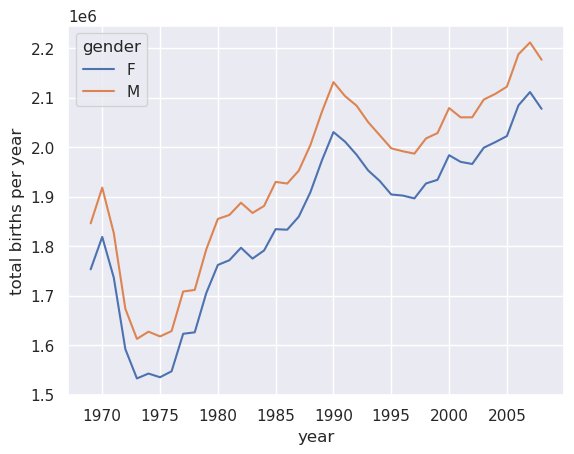

In [411]:
# visualise results

%matplotlib inline
import matplotlib.pyplot as plt

sns.set() #use seaborn styles
birth.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()

plt.ylabel('total births per year');

Further EDA

- clean data, remove outliers caused by mistyped dates (e.g., June 31st) or missing values (e.g., June 99th). One easy way to remove these all at once is to cut outliers; we'll do this via a robust sigma-clipping operation:


In [412]:
quartiles = np.percentile(birth['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])
# this line is an estimate of sample mean
# 0.74 comes from the interquartile range of Gaussian distribution


In [413]:
# use query() to filter out rows with births outside these values
births = birth.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [414]:
# set the day col to integers (previously a string as dataset had 'null')
births['day'] = births['day'].astype(int)

/tmp/ipykernel_723/3081405009.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  births['day'] = births['day'].astype(int)


In [415]:
births['day'].dtype

dtype('int64')

In [416]:
# create a datetime index from year, month, day

births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')

births['dayofweek'] = births.index.dayofweek

/tmp/ipykernel_723/1353628672.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  births['dayofweek'] = births.index.dayofweek


In [417]:
births.head()

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4


/tmp/ipykernel_723/832003187.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])


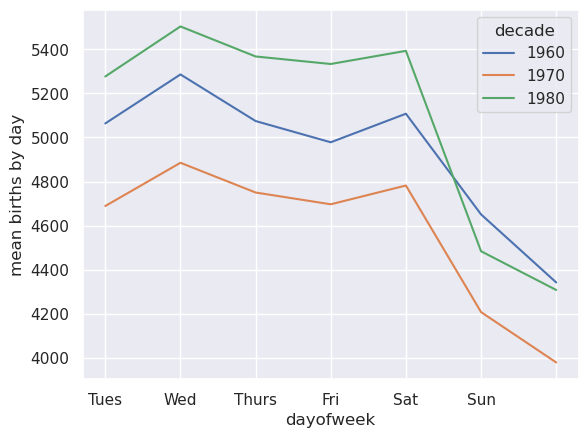

In [418]:
import matplotlib.pyplot as plt
import matplotlib as mpl

births.pivot_table('births', index='dayofweek',
                    columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');

In [419]:
# plot mean number of births by the day of the year
# group data by month and day separately 

births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day]
                                    )
births_by_date.head()
# results multi-indexed over months and days


births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [420]:
# change results into a date by associating months/day with a dummy year variable (make sure to choose a leap year so feb 29th okay)
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]
births_by_date.head()

/tmp/ipykernel_723/3537775468.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  births_by_date.index = [pd.datetime(2012, month, day)


,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


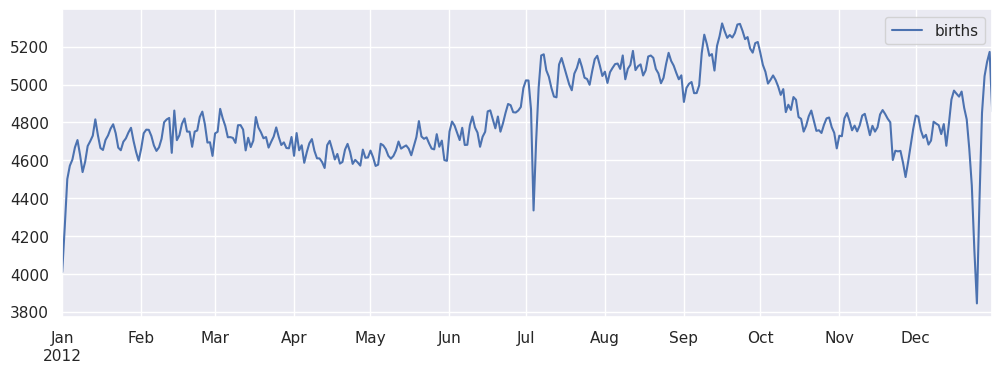

In [421]:
# we now have a timeseries reflecting the average number of births by date of the year

# plot the results
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

#  Vecotrized string operations

- manipulating string operations important with working with / cleaning real world data

## introducing pandas string operations

In [422]:
import numpy as np
x = np.array([2, 3, 5, 7, 11, 13])
x * 2

array([ 4,  6, 10, 14, 22, 26])

- this vectorisation of operations simplifies the syntax of operating on daya arrays. For arrays of strings, NumPy does not provide simple access - so stuck in loop

In [423]:
data = ['peter', 'Paul', 'MARY', 'guIDO']
[s.capitalize() for s in data]

['Peter', 'Paul', 'Mary', 'Guido']

In [424]:
# breaks if missing values 
data = ['peter', 'Paul', None, 'MARY', 'gUIDO']
[s.capitalize() for s in data]

AttributeError: 'NoneType' object has no attribute 'capitalize'

In [425]:
# create a pandas series:
import pandas as pd
names = pd.Series(data)
names

0    peter
1     Paul
2     None
3     MARY
4    gUIDO
dtype: object

In [426]:
# call a single method to capitalise all entries, while skip over missing values
names.str.capitalize()

0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

## Tables of Pandas String Methods

In [427]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])

### Methods similar to python string methods:
Nearly all Python's built-in string methods are mirrored by a Pandas vectorized string method. Here is a list of Pandas str methods that mirror Python string methods:

- len()	    lower()	     translate()	islower()

- ljust()	    upper()	     startswith()	isupper()

- rjust()	    find()	     endswith()	    isnumeric()

- center()	rfind()	     isalnum()	    isdecimal()

- zfill()	    index()	     isalpha()	    split()

- strip()	    rindex()	 isdigit()	    rsplit()

- rstrip()	capitalize() isspace()	    partition()

- lstrip()	swapcase()	 istitle()	    rpartition()


Notice that these have various return values. Some, like lower(), return a series of strings:

In [428]:
monte.str.lower()

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

In [429]:
monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

In [430]:
# boolean
monte.str.startswith('T')

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

In [431]:
monte.str.split()


0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

### Methods using regular expressions

In addition, there are several methods that accept regular expressions to examine the content of each string element, and follow some of the API conventions of Python's built-in re module:


Method	Description
- match()	Call re.match() on each element, returning a boolean.

- extract()	Call re.match() on each element, returning matched groups as strings.

- findall()	Call re.findall() on each element

- replace()	Replace occurrences of pattern with some other string

- contains()	Call re.search() on each element, returning a boolean

- count()	Count occurrences of pattern

- split()	Equivalent to str.split(), but accepts regexps

- rsplit()	Equivalent to str.rsplit(), but accepts regexps



With these, you can do a wide range of interesting operations. For example, we can extract the first name from each by asking for a contiguous group of characters at the beginning of each element:

In [432]:
monte.str.extract('([A-Za-z]+)', expand=False)

0     Graham
1       John
2      Terry
3       Eric
4      Terry
5    Michael
dtype: object

In [433]:
# find all names start and end with consonant
# make use with start of string (^) and end of string ($)

monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

### Miscellaneous methods

- get()	Index each element
- slice()	Slice each element
- slice_replace()	Replace slice in each element with passed value
- cat()	Concatenate strings
- repeat()	Repeat values
- normalize()	Return Unicode form of string
- pad()	Add whitespace to left, right, or both sides of strings
- wrap()	Split long strings into lines with length less than a given width
- join()	Join strings in each element of the Series with passed separator
- get_dummies()	extract dummy variables as a dataframe



Vectorised item access and slicing

- the get() and slice() enable vectorised element access from each array
- eg. can get a slice of the first three characters of each array via str.slice(0,3)
- can do this via Pandas normal indexing df.str.slice(0, 3) is equivalent to df.str[0:3]

In [434]:
monte.str[0:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

- get() and slice() access elements of arrays returned by split()
- eg. extract the last name of each entry, combine split() and get()

In [435]:
monte.str.split().str.get(-1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

Indicator variables

- get dummies() method:
- is useful when data has a col containing a coded indicator
- eg code: A = 'born in america', b = 'born in UK', c = 'likes chilli'

In [436]:
full_monte = pd.DataFrame({'name': monte,
                           'info': ['B|C|D', 'B|D', 'A|C',
                                    'B|D', 'B|C', 'B|C|D']})
full_monte

,name,info
0,Graham Chapman,B|C|D
1,John Cleese,B|D
2,Terry Gilliam,A|C
3,Eric Idle,B|D
4,Terry Jones,B|C
5,Michael Palin,B|C|D


 get_dummies() lets you quickly split out indicator variables into a DataFrame!

In [437]:
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


# Working with Time Series

Overview of date/time input data:

- Time stamps reference particular moments in time (e.g., July 4th, 2015 at 7:00am).
- Time intervals and periods reference a length of time between a particular beginning and end point; for example, the year 2015. Periods usually reference a special case of time intervals in which each interval is of uniform length and does not overlap (e.g., 24 hour-long periods comprising days).
- Time deltas or durations reference an exact length of time (e.g., a duration of 22.56 seconds).

## Dates and time in python

### Native python dates and times: datetime and dateutil

In [1]:
from datetime import datetime

datetime(year=2015, month =7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [3]:
# using dateutil module, can parse dates from a variety of string formats

from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [4]:
# once have a datetime obj, can do a variety of things
# eg. print the day of the week
date.strftime('%A')

'Saturday'

In the final line, we've used one of the standard string format codes for printing dates ("%A"), which you can read about in the ***strftime section*** of Python's **datetime documentation**. 
Documentation of other useful date utilities can be found in ***dateutil's online documentation.*** A related package to be aware of is pytz, which contains tools for working with the most migrane-inducing piece of time series data: time zones.

The power of datetime and dateutil lie in their flexibility and easy syntax: you can use these objects and their built-in methods to easily perform nearly any operation you might be interested in. Where they break down is when you wish to work with large arrays of dates and times: just as lists of Python numerical variables are suboptimal compared to NumPy-style typed numerical arrays, lists of Python datetime objects are suboptimal compared to typed arrays of encoded dates.

### Typed arrays of times: Numpy's datetime64

The datetime64 dtype encodes dates as 64-bit integers, and thus allows arrays of dates to be represented very compactly. The datetime64 requires a very specific input format:

In [5]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

Once we have this date formatted, however, we can quickly do vectorized operations on it:

In [6]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

Because of the uniform type in NumPy datetime64 arrays, this type of operation can be accomplished much more quickly than if we were working directly with Python's datetime objects, especially as arrays get large

One detail of the datetime64 and timedelta64 objects is that they are built on a fundamental time unit. Because the datetime64 object is limited to 64-bit precision, the range of encodable times is 264
 times this fundamental unit. In other words, datetime64 imposes a trade-off between time resolution and maximum time span.

For example, if you want a time resolution of one nanosecond, you only have enough information to encode a range of 264
 nanoseconds, or just under 600 years. NumPy will infer the desired unit from the input; for example, here is a day-based datetime:

In [7]:
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

In [8]:
# a minute-based datetime
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

- timezone auto set to local time on the computer executing code
- can forse any desired fundamental unit using format codes
- eg: force nanosecond based time

In [9]:
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

The following table, drawn from the NumPy datetime64 documentation, lists the available format codes along with the relative and absolute timespans that they can encode:

Code	Meaning	Time span (relative)	Time span (absolute)
- Y	Year	± 9.2e18 years	[9.2e18 BC, 9.2e18 AD]

- M	Month	± 7.6e17 years	[7.6e17 BC, 7.6e17 AD]

- W	Week	± 1.7e17 years	[1.7e17 BC, 1.7e17 AD]

- D	Day	± 2.5e16 years	[2.5e16 BC, 2.5e16 AD]

- h	Hour	± 1.0e15 years	[1.0e15 BC, 1.0e15 AD]

- m	Minute	± 1.7e13 years	[1.7e13 BC, 1.7e13 AD]

- s	Second	± 2.9e12 years	[ 2.9e9 BC, 2.9e9 AD]

- ms	Millisecond	± 2.9e9 years	[ 2.9e6 BC, 2.9e6 AD]

- us	Microsecond	± 2.9e6 years	[290301 BC, 294241 AD]

- ns	Nanosecond	± 292 years	[ 1678 AD, 2262 AD]

- ps	Picosecond	± 106 days	[ 1969 AD, 1970 AD]
- fs	Femtosecond	± 2.6 hours	[ 1969 AD, 1970 AD]
- as	Attosecond	± 9.2 seconds	[ 1969 AD, 1970 AD]

For the types of data we see in the real world, a useful default is datetime64[ns], as it can encode a useful range of modern dates with a suitably fine precision.

Finally, we will note that while the datetime64 data type addresses some of the deficiencies of the built-in Python datetime type, it lacks many of the convenient methods and functions provided by datetime and especially dateutil. More information can be found in NumPy's datetime64 documentation.

### Dates and times in pandas: best of both worlds

Pandas builds upon all the tools just discussed to provide a Timestamp object, which combines the ease-of-use of datetime and dateutil with the efficient storage and vectorized interface of numpy.datetime64. From a group of these Timestamp objects, Pandas can construct a DatetimeIndex that can be used to index data in a Series or DataFrame; we'll see many examples of this below.

For example, we can use Pandas tools to repeat the demonstration from above. We can parse a flexibly formatted string date, and use format codes to output the day of the week:

In [10]:
import pandas as pd
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [11]:
date.strftime('%A')

'Saturday'

In [12]:
# can do NumPy-style vectorized operations directly on this same object

date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

## Pandas time series: Indexing by time

Where the Pandas time series tools really become useful is when you begin to index data by timestamps. For example, we can construct a Series object that has time indexed data:

In [13]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

Now that we have this data in a Series, we can make use of any of the Series indexing patterns we discussed in previous sections, passing values that can be coerced into dates:

In [14]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

## Pandas Time Series Data Structures

This section will introduce the fundamental Pandas data structures for working with time series data:

- For time stamps, Pandas provides the Timestamp type. As mentioned before, it is essentially a replacement for Python's native datetime, but is based on the more efficient numpy.datetime64 data type. The associated Index structure is DatetimeIndex.
- For time Periods, Pandas provides the Period type. This encodes a fixed-frequency interval based on numpy.datetime64. The associated index structure is PeriodIndex.
- For time deltas or durations, Pandas provides the Timedelta type. Timedelta is a more efficient replacement for Python's native datetime.timedelta type, and is based on numpy.timedelta64. The associated index structure is TimedeltaIndex.

The most fundamental of these date/time objects are the Timestamp and DatetimeIndex objects. While these class objects can be invoked directly, it is more common to use the pd.to_datetime() function, which can parse a wide variety of formats. Passing a single date to pd.to_datetime() yields a Timestamp; passing a series of dates by default yields a DatetimeIndex:

In [15]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

DatetimeIndex can be converted to a PeriodIndex with the to_period() function with the addition of a frequency code; here we'll use 'D' to indicate daily frequency:

In [16]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]')

A TimedeltaIndex is created, for example, when a date is subtracted from another:

In [17]:
date - dates[0]

Timedelta('1 days 00:00:00')

### Regular sequences: pd.date_range()

To make the creation of regular date sequences more convenient, Pandas offers a few functions for this purpose: pd.date_range() for timestamps, pd.period_range() for periods, and pd.timedelta_range() for time deltas. We've seen that Python's range() and NumPy's np.arange() turn a startpoint, endpoint, and optional stepsize into a sequence. Similarly, pd.date_range() accepts a start date, an end date, and an optional frequency code to create a regular sequence of dates. By default, the frequency is one day:

In [18]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

Alternatively, the date range can be specified not with a start and endpoint, but with a startpoint and a number of periods:


In [19]:
pd.date_range('2015-07-03', periods=8)


DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

The spacing can be modified by altering the freq argument, which defaults to D. For example, here we will construct a range of hourly timestamps:


In [20]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

To create regular sequences of Period or Timedelta values, the very similar pd.period_range() and pd.timedelta_range() functions are useful. Here are some monthly periods:

In [21]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]')

Sequence of durations increasing by an hour:

In [22]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00'],
               dtype='timedelta64[ns]', freq='H')

## Frequencies and offsets

Fundamental to these Pandas time series tools is the concept of a frequency or date offset. Just as we saw the D (day) and H (hour) codes above, we can use such codes to specify any desired frequency spacing. The following table summarizes the main codes available:


Code	Description	Code	Description

D	Calendar day	

B	Business day

W	Weekly		

M	Month end	

BM	Business month end

Q	Quarter end	

BQ	Business quarter end

A	Year end	

BA	Business year end

H	Hours	

BH	Business hours

T	Minutes		

S	Seconds		

L	Milliseonds		

U	Microseconds		

N	nanoseconds		


The monthly, quarterly, and annual frequencies are all marked at the end of the specified period. By adding an S suffix to any of these, they instead will be marked at the beginning

Code	Description	
	
MS	Month start		

BMS	Business month start

QS	Quarter start		

BQS	Business quarter start

AS	Year start		

BAS	Business year start

Additionally, you can change the month used to mark any quarterly or annual code by adding a three-letter month code as a suffix:

Q-JAN, BQ-FEB, QS-MAR, BQS-APR, etc.
A-JAN, BA-FEB, AS-MAR, BAS-APR, etc.

In the same way, the split-point of the weekly frequency can be modified by adding a three-letter weekday code:

W-SUN, W-MON, W-TUE, W-WED, etc.

On top of this, codes can be combined with numbers to specify other frequencies. For example, for a frequency of 2 hours 30 minutes, we can combine the hour (H) and minute (T) codes as follows:

In [23]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00',
                '0 days 15:00:00', '0 days 17:30:00', '0 days 20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

All of these short codes refer to specific instances of Pandas time series offsets, which can be found in the pd.tseries.offsets module. For example, we can create a business day offset directly as follows:

In [24]:
from pandas.tseries.offsets import BDay

In [25]:
pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

## Resampling, Shifting, Windowing

Section depreciated - google, no longer provide historical stocks due to changes in their API.

In [2]:
# 

# from pandas_datareader import data

# goog = data.DataReader('GOOG', start='2004', end='2016',
#                        data_source='google')
# goog.head()


Alternative package and source:

In [4]:
# Importing the yfinance package
import yfinance as yf

# Set the start and end date
start_date = '2004-01-01'
end_date = '2016-01-01'

# Set the ticker
ticker = 'GOOGL'

# Get the data
data = yf.download(ticker, start_date, end_date)

# Print the last 5 rows
print(data.tail())

[*********************100%***********************]  1 of 1 completed
                                Open       High        Low      Close  \
Date                                                                    
2015-12-24 00:00:00-05:00  38.425999  38.459999  38.219501  38.292000   
2015-12-28 00:00:00-05:00  38.500000  39.140999  38.386501  39.112000   
2015-12-29 00:00:00-05:00  39.349499  39.934502  39.310001  39.698002   
2015-12-30 00:00:00-05:00  39.698002  39.823002  39.360001  39.514999   
2015-12-31 00:00:00-05:00  39.390999  39.416500  38.866001  38.900501   

                           Adj Close    Volume  
Date                                            
2015-12-24 00:00:00-05:00  38.292000  10412000  
2015-12-28 00:00:00-05:00  39.112000  31156000  
2015-12-29 00:00:00-05:00  39.698002  38430000  
2015-12-30 00:00:00-05:00  39.514999  28566000  
2015-12-31 00:00:00-05:00  38.900501  32752000  


In [5]:
data_close = data['Close']

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn; seaborn.set()

<AxesSubplot: xlabel='Date'>

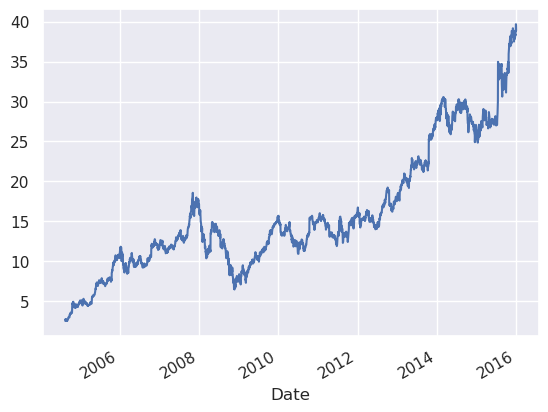

In [7]:
data_close.plot()

### Resampling and coverting frequencies

One common need for time series data is resampling at a higher or lower frequency. This can be done using the resample() method, or the much simpler asfreq() method. The primary difference between the two is that resample() is fundamentally a data aggregation, while asfreq() is fundamentally a data selection.

Taking a look at the Google closing price, let's compare what the two return when we down-sample the data. Here we will resample the data at the end of business year:

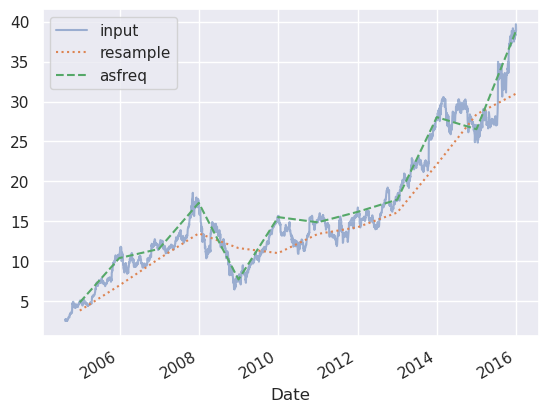

In [8]:
data_close.plot(alpha=0.5, style = '-')
data_close.resample('BA').mean().plot(style=':')
data_close.asfreq('BA').plot(style = '--');
plt.legend(['input', 'resample', 'asfreq'],
            loc = 'upper left')

- resample reports the average of the previous year
- asfreq reports the value at the end of the year.

Upsampling

For up-sampling, resample() and asfreq() are largely equivalent, though resample has many more options available. In this case, the default for both methods is to leave the up-sampled points empty, that is, filled with NA values. Just as with the pd.fillna() function discussed previously, asfreq() accepts a method argument to specify how values are imputed. Here, we will resample the business day data at a daily frequency (i.e., including weekends):

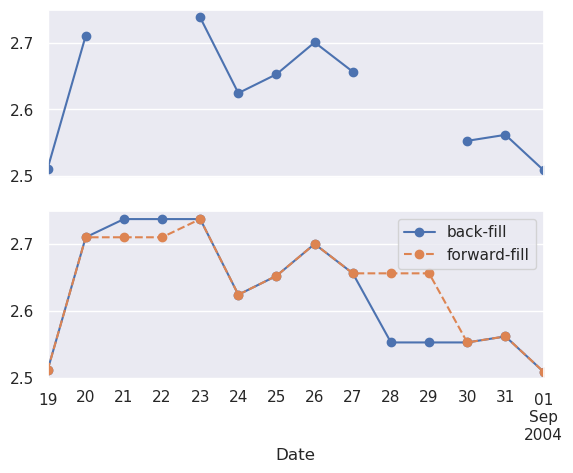

In [9]:
fig, ax = plt.subplots(2, sharex=True)
data = data_close.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);


Top: non-business days are left as NA values and do not appear on the plot

Bottom: panel shows the differences between two strategies for filling the gaps: forward-filling and backward-filling.

### Time-shifts

Another common time series-specific operation is shifting of data in time. Pandas has two closely related methods for computing this: shift() and tshift() In short, the difference between them is that shift() shifts the data, while tshift() shifts the index. In both cases, the shift is specified in multiples of the frequency.

Here we will both shift() and tshift() by 900 days;

/tmp/ipykernel_4598/1035037678.py:9: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  data.tshift(900).plot(ax=ax[2])


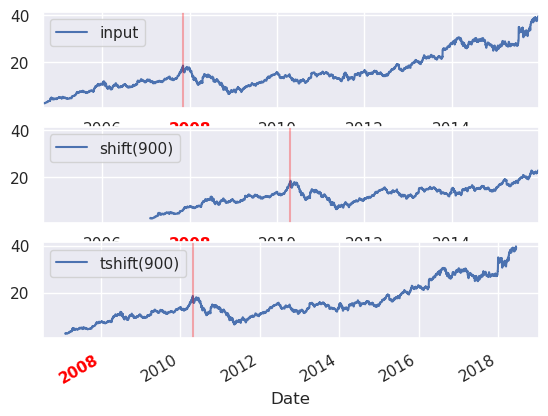

In [11]:
import pandas as pd
fig, ax = plt.subplots(3, sharey=True)

# apply a frequency to the data
data = data_close.asfreq('D', method='pad')

data.plot(ax=ax[0])
data.shift(900).plot(ax=ax[1])
data.tshift(900).plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

We see here that shift(900) shifts the data by 900 days, pushing some of it off the end of the graph (and leaving NA values at the other end), while tshift(900) shifts the index values by 900 days.

A common context for this type of shift is in computing differences over time. For example, we use shifted values to compute the one-year return on investment for Google stock over the course of the dataset:

/tmp/ipykernel_4598/3516060316.py:4: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  ROI = 100 * (data.tshift(-365) / data - 1)


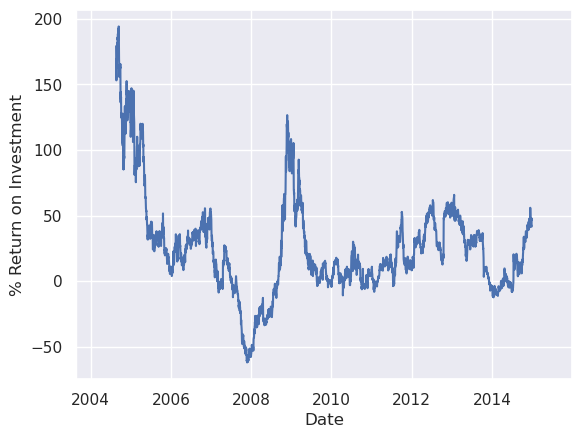

In [16]:
# apply a frequency to the data
data = data_close.asfreq('D', method='pad')

ROI = 100 * (data.tshift(-365) / data - 1)
ROI.plot()
plt.ylabel('% Return on Investment');

This helps us to see the overall trend in Google stock: thus far, the most profitable times to invest in Google have been (unsurprisingly, in retrospect) shortly after its IPO, and in the middle of the 2009 recession.


### Rolling windows

Rolling statistics are a third type of time series-specific operation implemented by Pandas. These can be accomplished via the rolling() attribute of Series and DataFrame objects, which returns a view similar to what we saw with the groupby operation (see Aggregation and Grouping). This rolling view makes available a number of aggregation operations by default.


For example, here is the one-year centered rolling mean and standard deviation of the Google stock prices

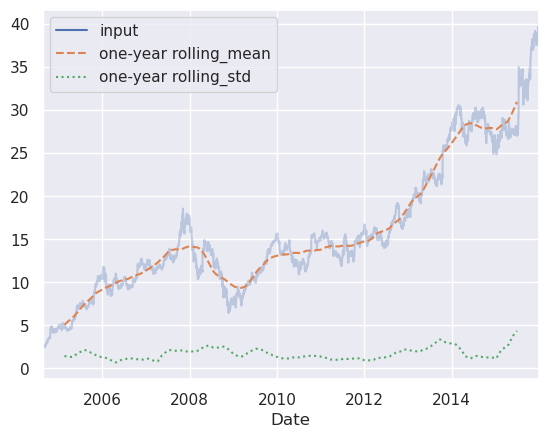

In [17]:
rolling = data.rolling(365, center=True)

data = pd.DataFrame({'input': data,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

As with group-by operations, the aggregate() and apply() methods can be used for custom rolling computations.

## Example: Visualizing Seattle Bicycle Counts

In [21]:
url = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?raw=True'
bikes = pd.read_csv(url, index_col='Date', parse_dates=True)
bikes.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2022-08-01 00:00:00,23.0,7.0,16.0
2022-08-01 01:00:00,12.0,5.0,7.0
2022-08-01 02:00:00,3.0,0.0,3.0
2022-08-01 03:00:00,5.0,2.0,3.0
2022-08-01 04:00:00,10.0,2.0,8.0


In [26]:
# Shorten names of col

bikes.rename(columns={'Fremont Bridge East Sidewalk' : 'East', 'Fremont Bridge West Sidewalk' : 'West'})


,Total,West,East
Date,,,
2022-08-01 00:00:00,23.0,7.0,16.0
2022-08-01 01:00:00,12.0,5.0,7.0
2022-08-01 02:00:00,3.0,0.0,3.0
2022-08-01 03:00:00,5.0,2.0,3.0
2022-08-01 04:00:00,10.0,2.0,8.0
...,...,...,...
2022-09-30 19:00:00,168.0,57.0,111.0
2022-09-30 20:00:00,73.0,33.0,40.0
2022-09-30 21:00:00,69.0,30.0,39.0


In [30]:
bikes.dropna().describe()

,Total,West,East
count,87586.000000,87586.000000,87586.000000
mean,107.240849,48.086623,59.154226
std,134.790561,61.573965,83.567491
min,0.000000,0.000000,0.000000
25%,13.000000,6.000000,7.000000
50%,60.000000,27.000000,30.000000
75%,144.000000,66.000000,75.000000
max,1097.000000,698.000000,850.000000


### Visualising the data

In [31]:
%matplotlib inline
import seaborn; seaborn.set()


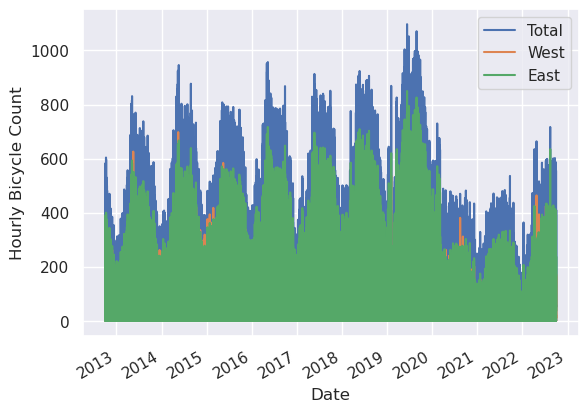

In [33]:
bikes.plot()
plt.ylabel('Hourly Bicycle Count');

Text(0, 0.5, 'Weekly bike count')

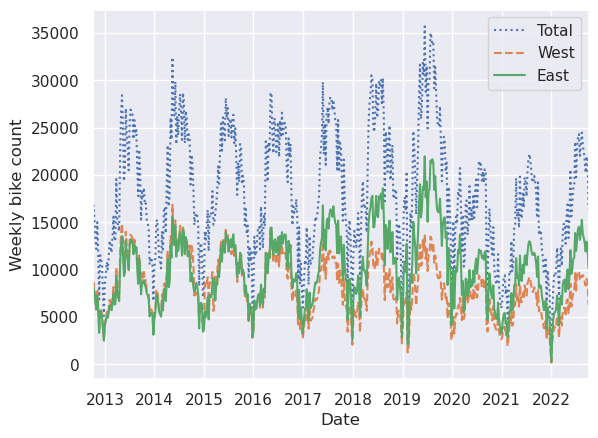

In [34]:
# resample as data is too dense

weekly = bikes.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bike count')

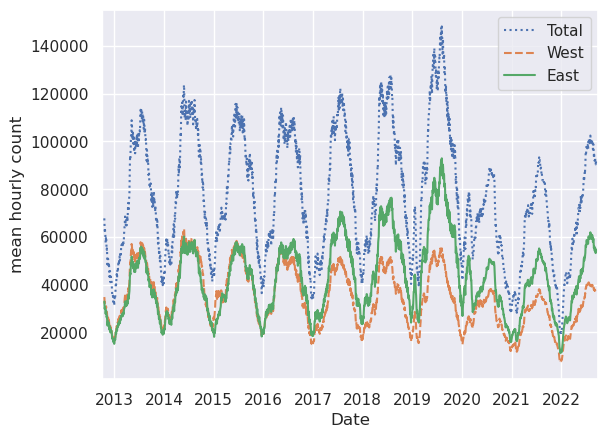

In [35]:
# 30 day rolling mean

daily = bikes.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count');

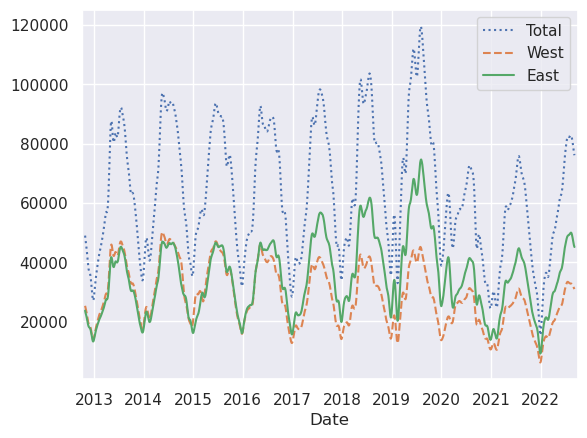

In [36]:
# smooth with gaussian 
# specifies both the width of the window (we chose 50 days) and the width of the Gaussian within the window (we chose 10 days):

daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);

### Digging into the data

While these smoothed data views are useful to get an idea of the general trend in the data, they hide much of the interesting structure. For example, we might want to look at the average traffic as a function of the time of day. We can do this using the GroupBy functionality discussed in Aggregation and Grouping:

In [44]:
import numpy as np

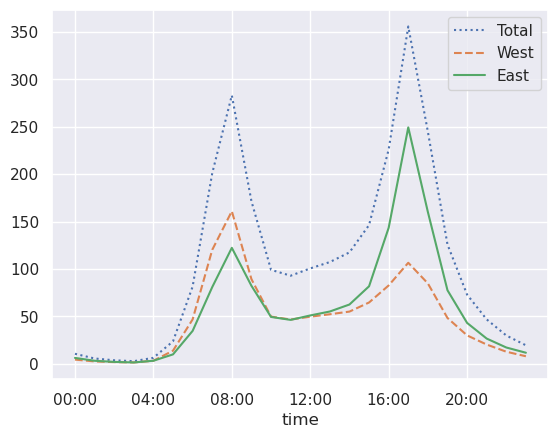

In [50]:
by_time = bikes.groupby(bikes.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

The hourly traffic is a strongly bimodal distribution, with peaks around 8:00 in the morning and 5:00 in the evening. This is likely evidence of a strong component of commuter traffic crossing the bridge. This is further evidenced by the differences between the western sidewalk (generally used going toward downtown Seattle), which peaks more strongly in the morning, and the eastern sidewalk (generally used going away from downtown Seattle), which peaks more strongly in the evening.

We also might be curious about how things change based on the day of the week. Again, we can do this with a simple groupby:

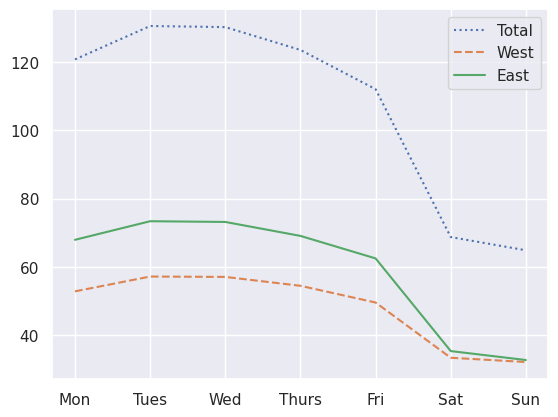

In [51]:
by_weekday = bikes.groupby(bikes.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

This shows a strong distinction between weekday and weekend totals, with around twice as many average riders crossing the bridge on Monday through Friday than on Saturday and Sunday.

With this in mind, let's do a compound GroupBy and look at the hourly trend on weekdays versus weekends. We'll start by grouping by both a flag marking the weekend, and the time of day:

In [53]:
weekend = np.where(bikes.index.weekday < 5, 'Weekday', 'Weekend')
by_time = bikes.groupby([weekend, bikes.index.time]).mean()

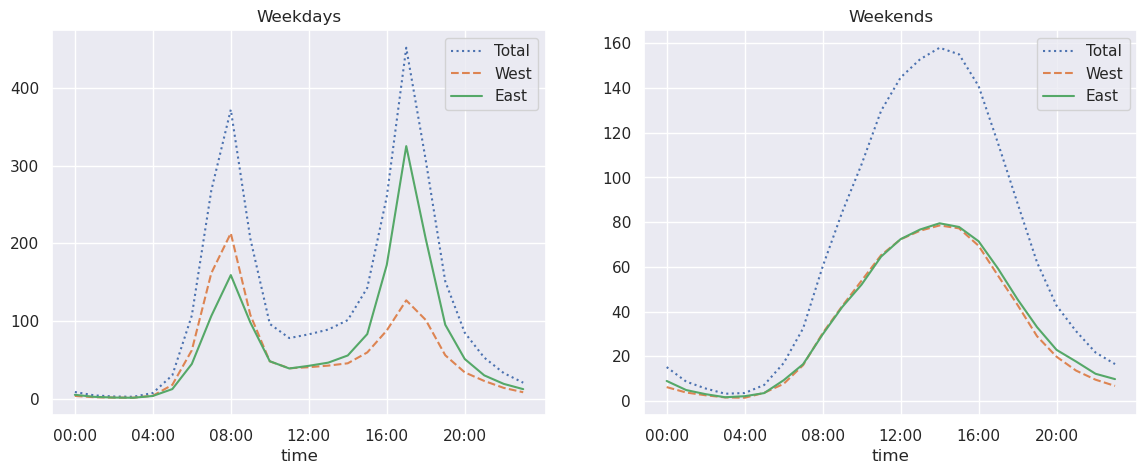

In [64]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-']);

The result is very interesting: we see a bimodal commute pattern during the work week, and a unimodal recreational pattern during the weekends. 

# High-Performance Pandas: eval() and query()

As we've already seen in previous sections, the power of the PyData stack is built upon the ability of NumPy and Pandas to push basic operations into C via an intuitive syntax: examples are vectorized/broadcasted operations in NumPy, and grouping-type operations in Pandas. While these abstractions are efficient and effective for many common use cases, they often rely on the creation of temporary intermediate objects, which can cause undue overhead in computational time and memory use.

As of version 0.13 (released January 2014), Pandas includes some experimental tools that allow you to directly access C-speed operations without costly allocation of intermediate arrays. These are the eval() and query() functions, which rely on the Numexpr package. In this notebook we will walk through their use and give some rules-of-thumb about when you might think about using them.

## Motivating query() and eval(): Compound expressions

NumPy and Pandas support fast vectorized operations; for example, when adding the elements of two arrays:

In [2]:
import numpy as np
rng = np.random.RandomState(42)
x = rng.rand(1000000)
y = rng.rand(1000000)
%timeit x + y

932 µs ± 26.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Faster than addition via a python loop or comprehension

In [3]:
%timeit np.fromiter((xi + yi for xi, yi in zip(x, y)), dtype=x.dtype, count=len(x))


101 ms ± 280 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


becomes less efficient when computing compound expressions. For example:

In [4]:
mask = (x > 0.5) & (y < 0.5)

Numpy equivalent: 


In [5]:
tmp1 = (x > 0.5)
tmp2 = (y < 0.5)
mask = tmp1 & tmp2

- every immediate step is explicitly allocated to memory 
- if x and y arrays are very large, can lead to significant memory and computational overlead
- Numexpr library enables computation of this compound expression element by element without need to allocate full intermediate arrays


In [7]:
import numexpr

In [8]:
mask_numexpr = numexpr.evaluate('(x > 0.5) & (y < 0.5)')
np.allclose(mask, mask_numexpr)

True

Numexpr evaluates the expression in a way that doesnt use full-sized temporary arrays, and can be more efficient than NumPy for larger arrays
- Pandas eval() and query() tools are similar and depend on Numexpr package

## *pandas.eval()* for efficient operations

eval() from pandas uses string expressions to efficiently compute operations using DataFrames. Eg:

In [10]:
import pandas as pd
nrows, ncols = 100000, 100

rng = np.random.RandomState(42)
df1, df2, df3, df4 = (pd.DataFrame(rng.rand(nrows, ncols))
                      for i in range(4))

To compute the sum of all four DataFrames using the typical Pandas approach, we can just write the sum:

In [11]:
%timeit df1 + df2 + df3 + df4

83.1 ms ± 1.68 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


The same result can be computed via pd.eval by constructing the expression as a string:

In [12]:
%timeit pd.eval('df1 + df2 + df3 + df4')

35.6 ms ± 1.13 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


The eval() version of this expression is about 50% faster (and uses much less memory), while giving the same result:

In [13]:
np.allclose(df1 + df2 + df3 + df4,
            pd.eval('df1 + df2 + df3 + df4'))

True

### Operations supported by pd.eval()

As of Pandas v0.16, pd.eval() supports a wide range of operations. To demonstrate these, we'll use the following integer DataFrames:

In [17]:
df1, df2, df3, df4, df5 = (pd.DataFrame(rng.randint(0, 1000, (100, 3)))
                            for i in range(5))

#### Arithmetic

In [20]:
result1 = -df1 * df2 / (df3 + df4) - df5
result2 = pd.eval('-df1 * df2 / (df3 + df4) - df5')
np.allclose(result1, result2)

True

#### Comparison operators

pd.eval() supports all comparison operators, including chained expressions:

In [21]:
result1 = (df1 < df2) & (df2 <= df3) & (df3 != df4)
result2 = pd.eval('df1 < df2 <= df3 != df4')
np.allclose(result1, result2)

True

#### Bitwise operators
pd.eval() supports the & and | bitwise operators:

In [22]:
result1 = (df1 < 0.5) & (df2 < 0.5) | (df3 < df4)
result2 = pd.eval('(df1 < 0.5) & (df2 < 0.5) | (df3 < df4)')
np.allclose(result1, result2)

True

In addition, it supports the use of the literal and and or in Boolean expressions:

In [23]:
result3 = pd.eval('(df1 < 0.5) and (df2 < 0.5) or (df3 < df4)')
np.allclose(result1, result3)

True

#### Object attributes and indices
pd.eval() supports access to object attributes via the obj.attr syntax, and indexes via the obj[index] syntax:

In [24]:
result1 = df2.T[0] + df3.iloc[1]
result2 = pd.eval('df2.T[0] + df3.iloc[1]')
np.allclose(result1, result2)

True

#### Other operations
Other operations such as function calls, conditional statements, loops, and other more involved constructs are currently not implemented in pd.eval(). If you'd like to execute these more complicated types of expressions, you can use the Numexpr library itself.

## *DataFrame.eval()* for Column-Wise Operations

Just as Pandas has a top-level pd.eval() function, DataFrames have an eval() method that works in similar ways. The benefit of the eval() method is that columns can be referred to by name. We'll use this labeled array as an example:

In [25]:
df = pd.DataFrame(rng.rand(1000, 3), columns=['A', 'B', 'C'])
df.head()

,A,B,C
0,0.061761,0.925463,0.997420
1,0.209863,0.280456,0.042148
2,0.738991,0.019046,0.715501
3,0.062857,0.516241,0.604588
4,0.204537,0.813392,0.244804


In [26]:
result1 = (df['A'] + df['B']) / (df['C'] - 1)
result2 = pd.eval("(df.A + df.B) / (df.C - 1)")
np.allclose(result1, result2)

True

DataFrame.eval() method:

In [27]:
result3 = df.eval('(A + B) / (C - 1)')
np.allclose(result1, result3)

True

### Assignment in DataFrame.eval()

In addition to the options just discussed, DataFrame.eval() also allows assignment to any column. Let's use the DataFrame from before, which has columns 'A', 'B', and 'C':

In [28]:
df.head()

,A,B,C
0,0.061761,0.925463,0.997420
1,0.209863,0.280456,0.042148
2,0.738991,0.019046,0.715501
3,0.062857,0.516241,0.604588
4,0.204537,0.813392,0.244804


We can use df.eval() to create a new column 'D' and assign to it a value computed from the other columns:

In [29]:
df.eval('D = (A + B) / C', inplace= True)
df.head()

,A,B,C,D
0,0.061761,0.925463,0.997420,0.989777
1,0.209863,0.280456,0.042148,11.633339
2,0.738991,0.019046,0.715501,1.059450
3,0.062857,0.516241,0.604588,0.957840
4,0.204537,0.813392,0.244804,4.158143


And modify:

In [30]:
df.eval('D = (A - B) / C', inplace=True)
df.head()

,A,B,C,D
0,0.061761,0.925463,0.997420,-0.865935
1,0.209863,0.280456,0.042148,-1.674903
2,0.738991,0.019046,0.715501,1.006210
3,0.062857,0.516241,0.604588,-0.749906
4,0.204537,0.813392,0.244804,-2.487117


### Local variables in DataFrame.eval()

The DataFrame.eval() method supports an additional syntax that lets it work with local Python variables. Consider the following:

The @ character here marks a variable name rather than a column name, and lets you efficiently evaluate expressions involving the two "namespaces": the namespace of columns, and the namespace of Python objects. Notice that this @ character is only supported by the DataFrame.eval() method, not by the pandas.eval() function, because the pandas.eval() function only has access to the one (Python) namespace.

In [31]:
column_mean = df.mean(1)
result1 = df['A'] + column_mean
result2 = df.eval('A + @column_mean')
np.allclose(result1, result2)

True

## DataFrame.query() Method

The DataFrame has another method based on evaluated strings, called the query() method. Consider the following:

In [32]:
result1 = df[(df.A < 0.5) & (df.B < 0.5)]
result2 = pd.eval('df[(df.A < 0.5) & (df.B < 0.5)]')
np.allclose(result1, result2)

True

As with the example used in our discussion of DataFrame.eval(), this is an expression involving columns of the DataFrame. It cannot be expressed using the DataFrame.eval() syntax, however! Instead, for this type of filtering operation, you can use the query() method:

In [33]:
result2 = df.query('A < 0.5 and B < 0.5')
np.allclose(result1, result2)

True

query() method also accepts the @ flag to mark local variables:

In [34]:
Cmean = df['C'].mean()
result1 = df[(df.A < Cmean) & (df.B < Cmean)]
result2 = df.query('A < @Cmean and B < @Cmean')
np.allclose(result1, result2)

True

## Performance: When to Use These Functions

When considering whether to use these functions, there are two considerations: computation time and memory use. Memory use is the most predictable aspect. As already mentioned, every compound expression involving NumPy arrays or Pandas DataFrames will result in implicit creation of temporary arrays: For example, this:

In [35]:
x = df[(df.A < 0.5) & (df.B < 0.5)]

In [36]:
# Equivalent to:
tmp1 = df.A < 0.5
tmp2 = df.B < 0.5
tmp3 = tmp1 & tmp2
x = df[tmp3]

If the size of the temporary DataFrames is significant compared to your available system memory (typically several gigabytes) then it's a good idea to use an eval() or query() expression. You can check the approximate size of your array in bytes using this:

In [37]:
df.values.nbytes

32000

On the performance side, eval() can be faster even when you are not maxing-out your system memory. The issue is how your temporary DataFrames compare to the size of the L1 or L2 CPU cache on your system (typically a few megabytes in 2016); if they are much bigger, then eval() can avoid some potentially slow movement of values between the different memory caches. In practice, I find that the difference in computation time between the traditional methods and the eval/query method is usually not significant–if anything, the traditional method is faster for smaller arrays! The benefit of eval/query is mainly in the saved memory, and the sometimes cleaner syntax they offer.

We've covered most of the details of eval() and query() here; for more information on these, you can refer to the Pandas documentation. In particular, different parsers and engines can be specified for running these queries; for details on this, see the discussion within the "Enhancing Performance" section.